Data Processing for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings # Ignore harmless warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

In [ ]:
df = pd.read_csv(r"C:\Users\Cody\Desktop\HR_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Check if there are unique columns to tell if 2 rows are duplicates of each other
df = df.drop_duplicates()
df.shape # Check to see how many rows dropped.

In [ ]:
# Check the types of each column, making sure date column is actually date instead of string.
df.dtypes

In [ ]:
# Timestamp column needs to be in the datetime format
df['Timestamp'] = df['Timestamp'].astype('datetime64[ns]')

In [ ]:
# For classification problems, I can break it into year, month, day, hour, minute, second as needed.
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day

In [5]:
df.shape

(14999, 10)

In [6]:
# Number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64


In [7]:
# Find the unique values in each column, to see if there are any categorical data needed to be transformed to numbers.
for col in df:
    print(f'{col}: {df[col].unique()}')

satisfaction_level: [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation: [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project: [2 5 7 6 4 3]
average_montly_hours: [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134

<AxesSubplot:>

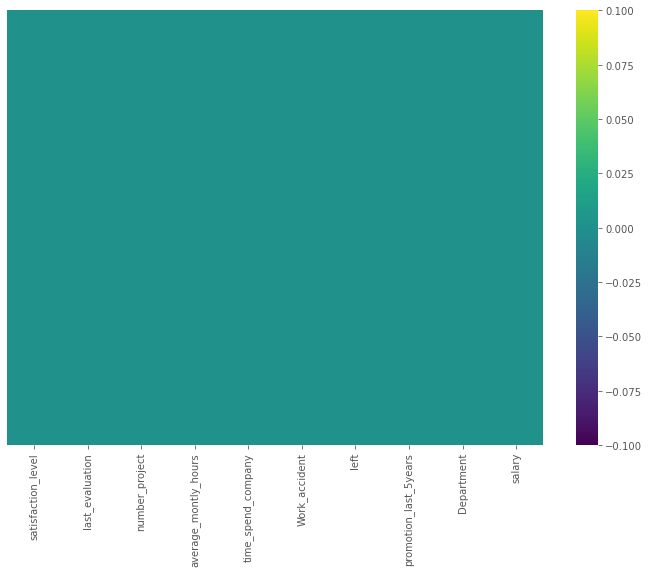

In [8]:
# See if there are null values from any column
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

satisfaction_level - 0.0%
last_evaluation - 0.0%
number_project - 0.0%
average_montly_hours - 0.0%
time_spend_company - 0.0%
Work_accident - 0.0%
left - 0.0%
promotion_last_5years - 0.0%
Department - 0.0%
salary - 0.0%


In [ ]:
# If your dataset is large, and only a few rows with null values.
df = df.dropna()
df.shape

In [10]:
# In this case, we don't have null values, but if we have too many null, we do the following.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Empty values, replaced by mean
imputer.fit(x[:, 1:3]) # Only numerical columns, it will look through all rows, columns 1-3
x[:, 1:3] = imputer.transform(x[:, 1:3]) # The 2nd and 3rd column of x will be replaced by the new data
# You can use print(x) to see the values

In [ ]:
# Depending on the dataset, NA can also mean 0. If so, you can replace NA with 0.
zero_fill_list = ['column_name', 'column_name_2']
df[zero_fill_list] = df[zero_fill_list].fillna(0)

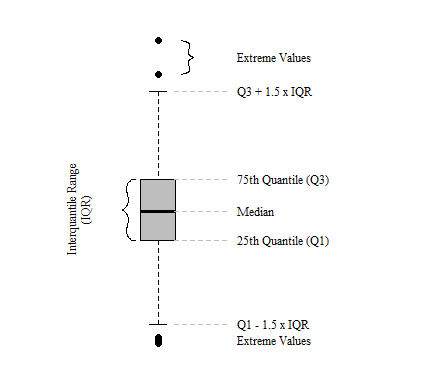

<AxesSubplot:ylabel='time_spend_company'>

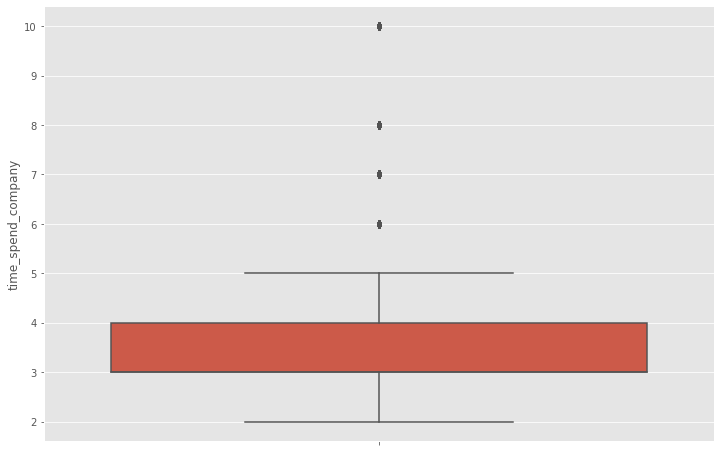

In [5]:
# Check for outliers
# Black dots are outliers
sns.boxplot(y='time_spend_company', data=df)

In [18]:
# Outlier treatement
outlier = np.percentile(df['Area Income'], [99])[0] # Find the outliers
df = df[(df['Area Income'] < outlier)] # Remove those outliers

In [29]:
# Feature Scaling: Prevent some features to dominate other features.
# No need to do this for all models. 
# Ex: Linear Regression has coeffient that take account which feature has higher and lower influence.
# Do not use on dummy variables because they will lose interpretation.
#np.set_printoptions(threshold=np.inf)
#print(x_train)
# Feature Scaling, drop columns with 'Time' or 'Dummy Variables'
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [ ]:
# Creating Dummy Variables, OneHotEncoder method #2
df = pd.get_dummies(dataset, drop_first=True)

In [ ]:
# Encoding Categorical Data for Independent Variables 
# department(x) and salary(y) column are strings, I need to convert them into numbers
# I create new columns for each value from the original column.
# Ex: salary has ['low' 'medium' 'high'], it create new columns: Low, Medium, High with 0 and 1 as output.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2, -1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
# ct=ColumnTransformer: [-2, -1] is referring to the last two columns department, salary.

In [12]:
# Encoding Categorical Data for Dependent Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # le = LabelEncoder
y = le.fit_transform(y)

In [ ]:
# identify independent and dependent variables, salary is dependent, everything else is indepedent.
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Identify variables method #2
from sklearn.model_selection import train_test_split
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [13]:
# Split Train/Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)